**OBSERVATIONS IN DATA FROM SONGS ON THE BILLBOAD (US) SINCE 1959**

In this project we observed patterns and interesting information about songs that have appeared on the Billboard charts in the United States since 1959. 

The dataset was built from wikipedia pages using scrapy web crawlers and contains information about songs such as *title*, *artist*, *year of release*, *duration* and other.



*imports and minor edits*

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

df = pd.read_csv('songs.csv')

In [234]:
def convert_time(time):
    if time == 'nan':
        return 0.00
    elif type(time)==float:
        return time
    times = time.split(':')
    mins = int(times[0])
    secs = int(times[1])
    return round(mins + secs / 60, 2)

df['length'] = df['length'].apply(convert_time)
df['year of release'] = df['year of release'].fillna(0).apply(lambda x: round(x))
df.rename(columns={'count': 'occurences on billboard'}, inplace=True)
# print(df.head())

***Overall number of occurences per genre (top 20 genres)***

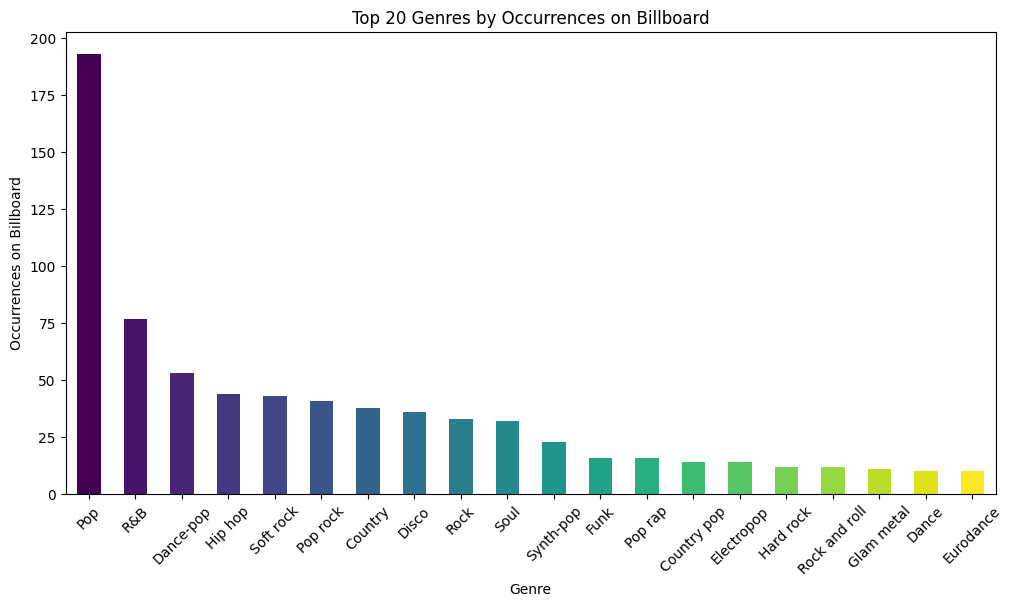

In [235]:

def occurence_per_genre():
    top_genres = df.groupby('genre')['occurences on billboard'].sum().nlargest(20)
    top_genres_sorted = top_genres.sort_values(ascending=False)  

    cmap = plt.get_cmap('viridis', len(top_genres_sorted))

    ax = top_genres_sorted.plot(kind='bar', color=[cmap(i) for i in range(len(top_genres_sorted))], figsize=(12, 6))
    ax.set_ylabel('Occurrences on Billboard')
    ax.set_xlabel('Genre')
    ax.set_title('Top 20 Genres by Occurrences on Billboard')
    plt.xticks(rotation=45)
    plt.show()

occurence_per_genre()

    


As expected, the songs that appeared on billboard most are of **Pop** genre, we can see that it surpasses the other genres by a large portion, even though some lesser genres still have 'Pop' in their name

***Median duration of songs on Billboard over the years***

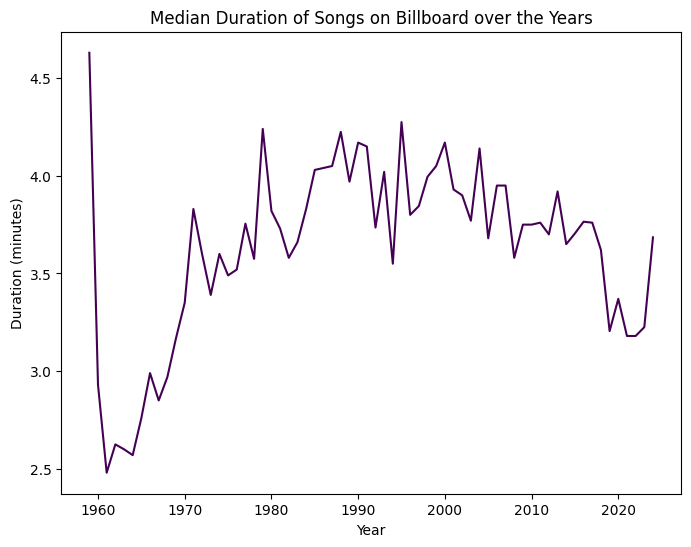

In [236]:
def length_by_year():

    fig, ax = plt.subplots(figsize=(8, 6))

    df.groupby('year of release')['length'].median().plot(ax=ax, colormap='viridis')
    ax.set_xlabel('Year')
    ax.set_ylabel('Duration (minutes)')
    ax.set_title('Median Duration of Songs on Billboard over the Years')

    plt.show()
length_by_year()

The figure above shows the median duration of songs on the Billboard over the years. We can see it settled just under the four minute mark around the year 1990, and then we can see a decreasing trend at the start of the new century up until now.

***Top 20 Artists with most occurences on Billboard***

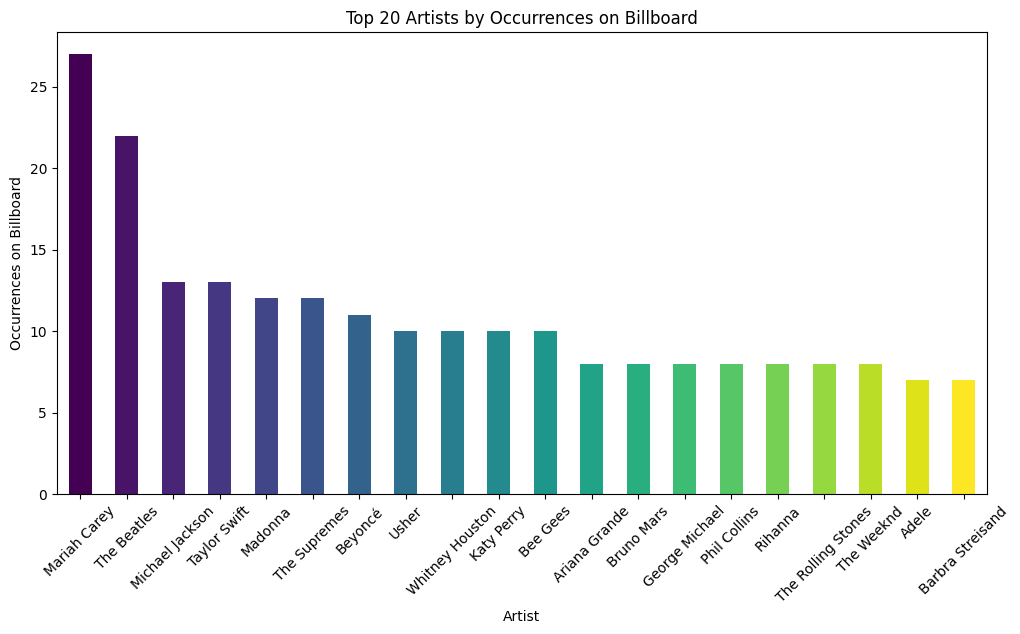

In [237]:
def artists_by_occurence():
    top_artists = df.groupby('artist')['occurences on billboard'].sum().nlargest(20)
    top_artists_sorted = top_artists.sort_values(ascending=False)  

    cmap = plt.get_cmap('viridis', len(top_artists_sorted))

    ax = top_artists_sorted.plot(kind='bar', color=[cmap(i) for i in range(len(top_artists_sorted))], figsize=(12, 6))
    ax.set_ylabel('Occurrences on Billboard')
    ax.set_xlabel('Artist')
    ax.set_title('Top 20 Artists by Occurrences on Billboard')
    plt.xticks(rotation=45)
    plt.show()
    
artists_by_occurence()

After analyzing the chart above, we can see Mariah Carey and The Beatles taking the lead with 27 and 22 occurences, after which is a steep drop off to Michael Jackson at 13, and then the list gradually decreases, similar to Figure 1.

***Duration of songs per Genre***

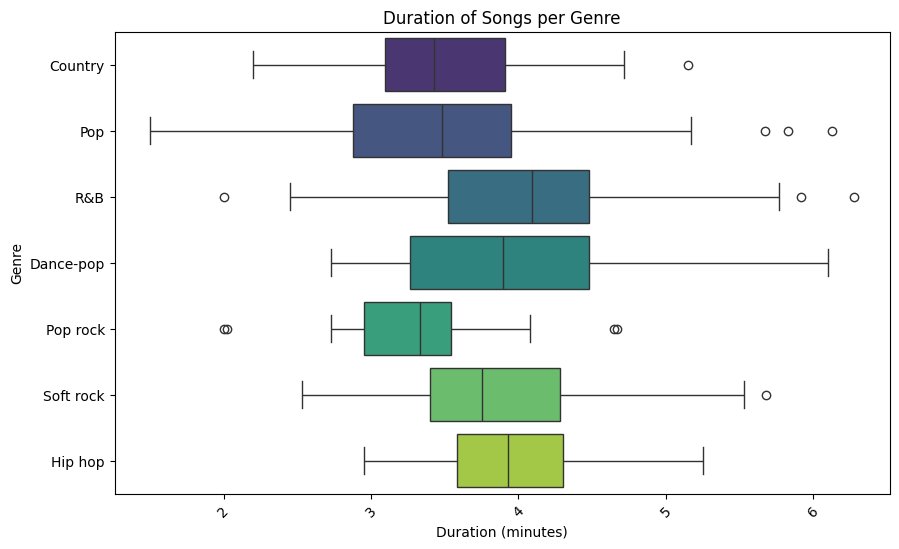

In [238]:
def genre_duration():

    fig, ax = plt.subplots(figsize=(10, 6))
    top_genres = df.groupby('genre')['occurences on billboard'].sum().nlargest(7).index
    df_top_genres = df[df['genre'].isin(top_genres)]
    
    sns.boxplot(x='length', y='genre', data=df_top_genres, ax=ax, hue='genre', palette='viridis')
    ax.set_ylabel('Genre')
    ax.set_xlabel('Duration (minutes)')
    ax.set_title('Duration of Songs per Genre')
    plt.xticks(rotation=45)
    plt.show()
    
genre_duration()

***Popularity of genres by year of release***

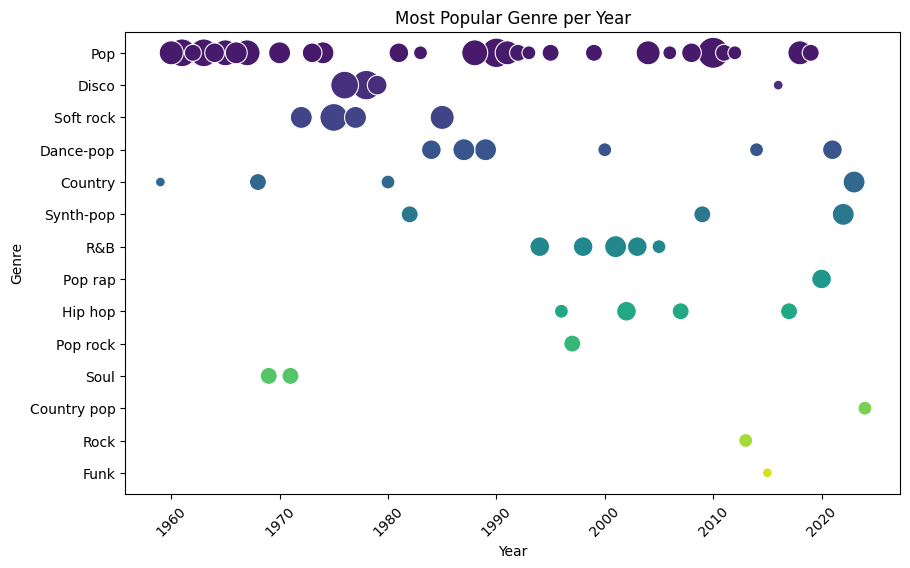

In [248]:
def popular_genre():

    top_genres = df.groupby('genre')['occurences on billboard'].sum().nlargest(15).index
    fig, ax = plt.subplots(figsize=(10, 6))
    df_popular_genre = df.groupby(['year of release', 'genre'])['occurences on billboard'].sum().reset_index()
    df_popular_genre = df_popular_genre[df_popular_genre['genre'].isin(top_genres)]
    df_popular_genre = df_popular_genre.sort_values(by='occurences on billboard', ascending=False)
    df_popular_genre = df_popular_genre.drop_duplicates(subset='year of release', keep='first')
    sns.scatterplot(x='year of release', y='genre', size='occurences on billboard', data=df_popular_genre, ax=ax, hue='genre', sizes=(50, 500), legend=False, palette='viridis')
    ax.set_ylabel('Genre')
    ax.set_xlabel('Year')
    ax.set_title('Most Popular Genre per Year')
    plt.xticks(rotation=45)
    
    
    plt.show()

popular_genre()
